In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ML Practical No.-3(diabetic).csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
x = data.iloc[:,:-1].values

In [8]:
y = data.Outcome

In [9]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
from scipy import stats
data_zscore = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [12]:
import pandas as pd

def remove_outliers(data,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = data[col].mean()
        sd = data[col].std()
        
        data = data[(data[col] <= mean+(n_std*sd))]
        
    return data

In [13]:
columns = data.columns
n_std = 4
data_no_outliers = remove_outliers(data_zscore, columns, n_std)

Working on column: Pregnancies
Working on column: Glucose
Working on column: BloodPressure
Working on column: SkinThickness
Working on column: Insulin
Working on column: BMI
Working on column: DiabetesPedigreeFunction
Working on column: Age
Working on column: Outcome


In [14]:
data_no_outliers.shape

(687, 9)

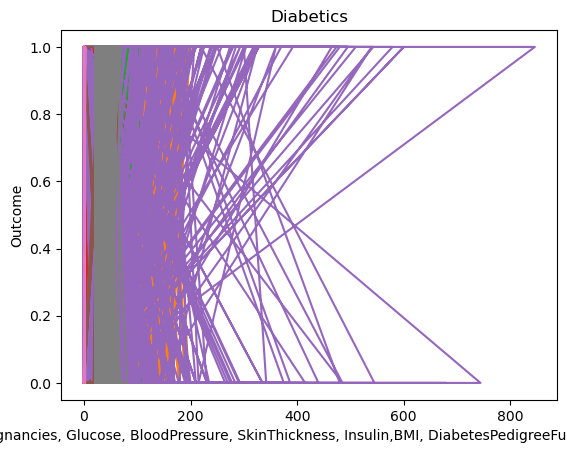

In [15]:
plt.plot(x,y)
plt.xlabel("Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age")
plt.ylabel("Outcome")
plt.title("Diabetics")
plt.show()

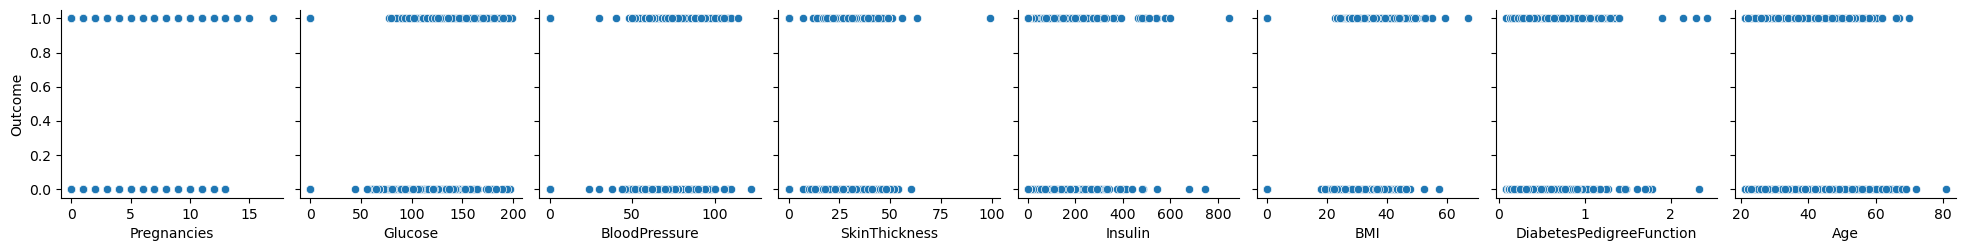

In [16]:
sns.pairplot(data,x_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                            'BMI', 'DiabetesPedigreeFunction', 'Age'],y_vars = 'Outcome',kind = 'scatter', diag_kind = None)

In [17]:
X = data_no_outliers.iloc[:,:-1].values

In [18]:
Y = data_no_outliers.Outcome

In [19]:
import sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,train_size=0.70)

In [22]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()

In [23]:
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [24]:
from sklearn import linear_model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_predicted = model.predict(x_test)

In [29]:
y_predicted

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
x_test

array([[-0.86059667, -1.16503371, -0.53042771, ..., -0.85371934,
        -0.38167471, -0.158196  ],
       [-0.24496865, -0.79199684, -1.3782642 , ..., -1.14415206,
         1.71012847,  0.5539642 ],
       [-1.16841068,  0.59841331, -0.19129311, ...,  0.15515222,
        -1.0201509 , -0.95937624],
       ...,
       [-1.16841068, -0.5206973 , -0.699995  , ...,  0.21629595,
         0.17919663, -0.95937624],
       [-0.55278266, -0.92764661, -1.71739879, ..., -0.3187117 ,
        -1.12244819, -0.95937624],
       [ 0.67847338, -0.92764661, -0.8695623 , ..., -0.02827898,
        -1.31998778,  1.17710438]])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(y_test,y_predicted)

In [33]:
mse

0.2222222222222222

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mae  = mean_absolute_error(y_test,y_predicted)

In [36]:
mae

0.2222222222222222

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

In [38]:
mape = mean_absolute_percentage_error(y_test,y_predicted)

In [39]:
mape

391617358901782.44

In [40]:
accuracy = 100 - mape

In [41]:
accuracy

-391617358901682.44

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
accuracy = accuracy_score(y_test,y_predicted)

In [44]:
print('accuracy :', accuracy*100)

accuracy : 77.77777777777779


In [45]:
cm = confusion_matrix(y_test,y_predicted)

In [46]:
cm

array([[120,  18],
       [ 28,  41]], dtype=int64)